In [1]:
import numpy as np
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Dropout, Activation, Input
from keras.optimizers import Adam
from keras.utils import np_utils
import matplotlib.pyplot as plt
from keras import backend as Backend
Backend.tensorflow_backend._get_available_gpus()
Backend.set_image_dim_ordering('th')
import tensorflow as k
config = k.ConfigProto()
config.gpu_options.allow_growth = True
import pandas as pd
from sklearn.model_selection import train_test_split


/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
np.random.seed(80)

In [3]:
NB_EPOCH = 250
BATCH_SIZE = 128
N_HIDDEN = 128
VERBOSE = 1
NB_CLASSES = 10
OPT = Adam()
VALIDATION_SPLIT = 0.2
DROPOUT = 0.3

In [4]:
RESHAPED = 784 #28x28

## Data loading

In [5]:
df = pd.read_csv('../input/train.csv')

In [6]:
X = df.iloc[:,1:].values
y = df.iloc[:,:1].values

In [7]:
df.values.shape

(42000, 785)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [9]:
X_train = X_train.reshape(X_train.shape[0], RESHAPED)
X_test = X_test.reshape(X_test.shape[0],RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

### Normalize

In [10]:
X_train = X_train/255
X_test = X_test/255

### One Hot

In [11]:
y_train = np_utils.to_categorical(y_train,NB_CLASSES)

In [12]:
y_test = np_utils.to_categorical(y_test,NB_CLASSES)

In [13]:
X_train.shape[1]

784

## Build Model

In [14]:
def baseline_model():
    model_in = Input((X_train.shape[1],))
    model = Dense(N_HIDDEN,activation='relu')(model_in)
    model = Dropout(DROPOUT)(model)
    model = Dense(N_HIDDEN,activation='relu')(model)
    model = Dropout(DROPOUT)(model)
    model = Dense(NB_CLASSES,activation='softmax')(model)
    model = Model(model_in,model)
    model.summary()
    model.compile(loss='categorical_crossentropy',optimizer=OPT,metrics=['accuracy'])
    return model

In [15]:
model = baseline_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


## Train Data

In [16]:
history = model.fit(X_train,y_train,batch_size=BATCH_SIZE,epochs=NB_EPOCH,verbose=VERBOSE,validation_split=VALIDATION_SPLIT)

Train on 22512 samples, validate on 5628 samples
Epoch 1/250
22512/22512 [==============================] - 1s 63us/step - loss: 0.7091 - acc: 0.7793 - val_loss: 0.2544 - val_acc: 0.9279
Epoch 2/250
22512/22512 [==============================] - 1s 43us/step - loss: 0.3169 - acc: 0.9069 - val_loss: 0.2077 - val_acc: 0.9391
Epoch 3/250
22512/22512 [==============================] - 1s 44us/step - loss: 0.2418 - acc: 0.9287 - val_loss: 0.1559 - val_acc: 0.9534
Epoch 4/250
22512/22512 [==============================] - 1s 44us/step - loss: 0.1968 - acc: 0.9415 - val_loss: 0.1416 - val_acc: 0.9584
Epoch 5/250
22512/22512 [==============================] - 1s 44us/step - loss: 0.1687 - acc: 0.9484 - val_loss: 0.1299 - val_acc: 0.9629
Epoch 6/250
22512/22512 [==============================] - 1s 44us/step - loss: 0.1530 - acc: 0.9542 - val_loss: 0.1166 - val_acc: 0.9650
Epoch 7/250
22512/22512 [==============================] - 1s 43us/step - loss: 0.1327 - acc: 0.9603 - val_loss: 0.1188 - v

22512/22512 [==============================] - 1s 43us/step - loss: 0.0256 - acc: 0.9912 - val_loss: 0.1382 - val_acc: 0.9735
Epoch 60/250
22512/22512 [==============================] - 1s 44us/step - loss: 0.0237 - acc: 0.9916 - val_loss: 0.1389 - val_acc: 0.9746
Epoch 61/250
22512/22512 [==============================] - 1s 44us/step - loss: 0.0209 - acc: 0.9924 - val_loss: 0.1367 - val_acc: 0.9728
Epoch 62/250
22512/22512 [==============================] - 1s 43us/step - loss: 0.0250 - acc: 0.9924 - val_loss: 0.1349 - val_acc: 0.9742
Epoch 63/250
22512/22512 [==============================] - 1s 43us/step - loss: 0.0258 - acc: 0.9919 - val_loss: 0.1421 - val_acc: 0.9723
Epoch 64/250
22512/22512 [==============================] - 1s 44us/step - loss: 0.0261 - acc: 0.9914 - val_loss: 0.1430 - val_acc: 0.9755
Epoch 65/250
22512/22512 [==============================] - 1s 44us/step - loss: 0.0241 - acc: 0.9915 - val_loss: 0.1461 - val_acc: 0.9746
Epoch 66/250
22512/22512 [==============

22512/22512 [==============================] - 1s 43us/step - loss: 0.0154 - acc: 0.9948 - val_loss: 0.1668 - val_acc: 0.9748
Epoch 118/250
22512/22512 [==============================] - 1s 43us/step - loss: 0.0191 - acc: 0.9934 - val_loss: 0.1404 - val_acc: 0.9753
Epoch 119/250
22512/22512 [==============================] - 1s 44us/step - loss: 0.0153 - acc: 0.9946 - val_loss: 0.1439 - val_acc: 0.9741
Epoch 120/250
22512/22512 [==============================] - 1s 44us/step - loss: 0.0175 - acc: 0.9939 - val_loss: 0.1552 - val_acc: 0.9746
Epoch 121/250
22512/22512 [==============================] - 2s 70us/step - loss: 0.0150 - acc: 0.9950 - val_loss: 0.1584 - val_acc: 0.9735
Epoch 122/250
22512/22512 [==============================] - 2s 77us/step - loss: 0.0143 - acc: 0.9952 - val_loss: 0.1479 - val_acc: 0.9753
Epoch 123/250
22512/22512 [==============================] - 2s 76us/step - loss: 0.0138 - acc: 0.9954 - val_loss: 0.1655 - val_acc: 0.9723
Epoch 124/250
22512/22512 [=======

22512/22512 [==============================] - 1s 47us/step - loss: 0.0172 - acc: 0.9940 - val_loss: 0.1606 - val_acc: 0.9760
Epoch 176/250
22512/22512 [==============================] - 1s 44us/step - loss: 0.0157 - acc: 0.9950 - val_loss: 0.1729 - val_acc: 0.9744
Epoch 177/250
22512/22512 [==============================] - 1s 43us/step - loss: 0.0134 - acc: 0.9954 - val_loss: 0.1689 - val_acc: 0.9751
Epoch 178/250
22512/22512 [==============================] - 1s 44us/step - loss: 0.0147 - acc: 0.9952 - val_loss: 0.1590 - val_acc: 0.9753
Epoch 179/250
22512/22512 [==============================] - 1s 44us/step - loss: 0.0156 - acc: 0.9948 - val_loss: 0.1645 - val_acc: 0.9739
Epoch 180/250
22512/22512 [==============================] - 1s 44us/step - loss: 0.0111 - acc: 0.9965 - val_loss: 0.1623 - val_acc: 0.9753
Epoch 181/250
22512/22512 [==============================] - 1s 44us/step - loss: 0.0155 - acc: 0.9955 - val_loss: 0.1698 - val_acc: 0.9741
Epoch 182/250
22512/22512 [=======

22512/22512 [==============================] - 1s 44us/step - loss: 0.0112 - acc: 0.9968 - val_loss: 0.1609 - val_acc: 0.9753
Epoch 234/250
22512/22512 [==============================] - 1s 43us/step - loss: 0.0102 - acc: 0.9965 - val_loss: 0.1815 - val_acc: 0.9748
Epoch 235/250
22512/22512 [==============================] - 1s 44us/step - loss: 0.0121 - acc: 0.9956 - val_loss: 0.1641 - val_acc: 0.9757
Epoch 236/250
22512/22512 [==============================] - 1s 44us/step - loss: 0.0107 - acc: 0.9961 - val_loss: 0.1651 - val_acc: 0.9748
Epoch 237/250
22512/22512 [==============================] - 1s 47us/step - loss: 0.0124 - acc: 0.9961 - val_loss: 0.1697 - val_acc: 0.9751
Epoch 238/250
22512/22512 [==============================] - 1s 44us/step - loss: 0.0135 - acc: 0.9953 - val_loss: 0.1665 - val_acc: 0.9751
Epoch 239/250
22512/22512 [==============================] - 1s 43us/step - loss: 0.0150 - acc: 0.9953 - val_loss: 0.1741 - val_acc: 0.9748
Epoch 240/250
22512/22512 [=======

## summarize history for accuracy

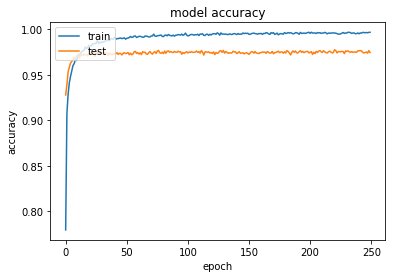

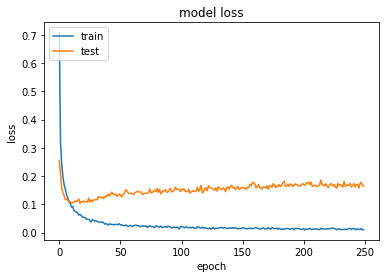

In [17]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [18]:
score = model.evaluate(X_test,y_test,verbose=VERBOSE)

13860/13860 [==============================] - 1s 55us/step


In [19]:
score

[0.1654377258104127, 0.9735930735930736]

# CNN

In [20]:
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Flatten
from keras.optimizers import SGD, Adam, RMSprop

In [21]:
def cnn(input_shape,classes):
    model_in = Input(shape=input_shape)
    model = Conv2D(20,kernel_size=5,padding='same',activation='relu')(model_in)
    model = MaxPooling2D(pool_size=(2,2),strides=(2,2))(model)
    model = Conv2D(50,kernel_size=5,activation='relu')(model)
    model = MaxPooling2D(pool_size=(2,2),strides=(2,2))(model)
    
    model = Flatten()(model)
    model = Dense(500,activation='relu')(model)
    model = Dense(classes,activation='softmax')(model)
    
    model = Model(model_in,model)
    return model

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [23]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train/255
X_test = X_test/255

In [24]:
NB_EPOCH = 20
BATCH_SIZE = 128
VERBOSE = 1
OPT = Adam()
VALIDATION_SPLIT = 0.2
IMG_ROWS,IMG_COLS = 28,28 # input image's dimensions
NB_CLASSES = 10
INPUT_SHAPE = (1,IMG_ROWS,IMG_COLS)

In [25]:
X_train = X_train.reshape(X_train.shape[0], 28,28)
X_test = X_test.reshape(X_test.shape[0],28,28)

In [26]:
X_train = X_train[:,np.newaxis,:,:]
X_test = X_test[:,np.newaxis,:,:]

In [27]:
y_train = np_utils.to_categorical(y_train,NB_CLASSES)
y_test = np_utils.to_categorical(y_test,NB_CLASSES)

In [28]:
model = cnn(INPUT_SHAPE,NB_CLASSES)

In [29]:
model.compile(loss='categorical_crossentropy',optimizer=OPT,metrics=['accuracy'])

In [30]:
history = model.fit(X_train,y_train,batch_size=BATCH_SIZE,epochs=NB_EPOCH,verbose=VERBOSE,validation_split=VALIDATION_SPLIT)

Train on 22512 samples, validate on 5628 samples
Epoch 1/20
22512/22512 [==============================] - 3s 134us/step - loss: 0.3076 - acc: 0.9077 - val_loss: 0.0979 - val_acc: 0.9703
Epoch 2/20
22512/22512 [==============================] - 2s 86us/step - loss: 0.0784 - acc: 0.9760 - val_loss: 0.0632 - val_acc: 0.9817
Epoch 3/20
22512/22512 [==============================] - 2s 84us/step - loss: 0.0525 - acc: 0.9831 - val_loss: 0.0691 - val_acc: 0.9778
Epoch 4/20
22512/22512 [==============================] - 2s 85us/step - loss: 0.0374 - acc: 0.9874 - val_loss: 0.0497 - val_acc: 0.9865
Epoch 5/20
22512/22512 [==============================] - 2s 84us/step - loss: 0.0262 - acc: 0.9919 - val_loss: 0.0469 - val_acc: 0.9877
Epoch 6/20
22512/22512 [==============================] - 2s 84us/step - loss: 0.0210 - acc: 0.9938 - val_loss: 0.0466 - val_acc: 0.9872
Epoch 7/20
22512/22512 [==============================] - 2s 84us/step - loss: 0.0193 - acc: 0.9937 - val_loss: 0.0500 - val_acc

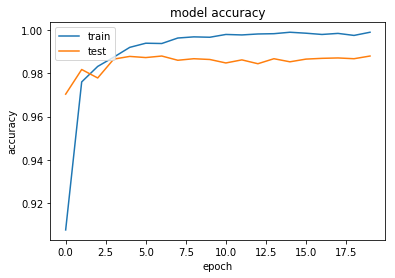

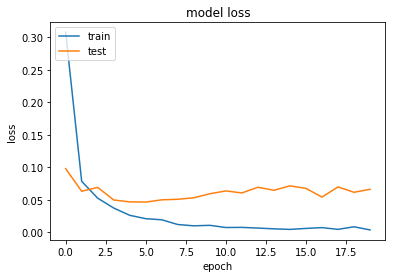

In [31]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [32]:
score = model.evaluate(X_test,y_test,verbose=VERBOSE)

13860/13860 [==============================] - 1s 72us/step


In [33]:
score

[0.047938328792012236, 0.9902597402597403]